## Эксперимент на sailboat & logo

In [1]:
from src import HybridMetaheuristic


model = HybridMetaheuristic("pic/sailboat.png", "pic/logo.png")

In [2]:
# Запускаю алгоритм гибридной метаэвристики
model.evolution()

  0%|                                                   | 0/100 [00:00<?, ?it/s]

Best score: 2.380085294972476


  1%|▍                                       | 1/100 [05:07<8:27:53, 307.81s/it]

Best score: 2.3797793242070338


  9%|███▌                                    | 9/100 [46:05<8:13:03, 325.09s/it]

Best score: 2.379215078048193


 10%|███▉                                   | 10/100 [51:13<7:59:46, 319.85s/it]

Best score: 2.377434152582201


 14%|█████▏                               | 14/100 [1:02:00<4:41:42, 196.54s/it]

Best score: 2.3771398666788146


 15%|█████▌                               | 15/100 [1:04:26<4:16:45, 181.24s/it]

Best score: 2.376526450475072


 16%|█████▉                               | 16/100 [1:07:04<4:04:06, 174.36s/it]

Best score: 2.376441672419345


 18%|██████▋                              | 18/100 [1:12:06<3:38:43, 160.04s/it]

Best score: 2.376280890772649


 19%|███████                              | 19/100 [1:14:50<3:37:32, 161.14s/it]

Best score: 2.3756408333042454


 21%|███████▊                             | 21/100 [1:20:13<3:35:54, 163.98s/it]

Best score: 2.3754074760698276


 22%|████████▏                            | 22/100 [1:22:42<3:27:07, 159.33s/it]

Best score: 2.3745699724935676


 25%|█████████▎                           | 25/100 [1:29:54<3:06:34, 149.27s/it]

Best score: 2.373889000443476


 34%|████████████▌                        | 34/100 [1:51:21<2:41:39, 146.96s/it]

Best score: 2.3737991989603326


 37%|█████████████▋                       | 37/100 [1:58:06<2:25:52, 138.92s/it]

Best score: 2.372647800457206


 42%|███████████████▌                     | 42/100 [2:08:51<2:07:08, 131.53s/it]

Best score: 2.3722161072111554


 44%|████████████████▎                    | 44/100 [2:14:15<2:17:22, 147.18s/it]

Best score: 2.3718954364794325


 45%|████████████████▋                    | 45/100 [2:16:24<2:09:48, 141.62s/it]

Best score: 2.371633928258149


 46%|█████████████████                    | 46/100 [2:18:53<2:09:38, 144.04s/it]

Best score: 2.3710908904560175


 49%|██████████████████▏                  | 49/100 [2:25:31<1:54:39, 134.89s/it]

Best score: 2.370939655764633


 50%|██████████████████▌                  | 50/100 [2:27:46<1:52:23, 134.87s/it]

Best score: 2.370933338467533


 51%|██████████████████▊                  | 51/100 [2:31:06<2:06:17, 154.63s/it]

Best score: 2.370097984191337


 53%|███████████████████▌                 | 53/100 [2:36:57<2:08:45, 164.37s/it]

Best score: 2.369763474670762


 55%|████████████████████▎                | 55/100 [2:42:54<2:05:43, 167.64s/it]

Best score: 2.3694333433881383


 56%|████████████████████▋                | 56/100 [2:46:21<2:11:30, 179.33s/it]

Best score: 2.369288490315841


 62%|██████████████████████▉              | 62/100 [3:01:06<1:35:11, 150.30s/it]

Best score: 2.3692514674959915
Best score: 2.3688885576626832


 66%|████████████████████████▍            | 66/100 [3:11:08<1:24:20, 148.83s/it]

Best score: 2.368591987784188


 91%|███████████████████████████████████▍   | 91/100 [4:10:43<22:30, 150.11s/it]

Best score: 2.3684313209967964


 97%|█████████████████████████████████████▊ | 97/100 [4:26:30<08:07, 162.61s/it]

Best score: 2.3683131476432235


 98%|██████████████████████████████████████▏| 98/100 [4:28:52<05:12, 156.32s/it]

Best score: 2.3680412989188153


100%|██████████████████████████████████████| 100/100 [4:34:29<00:00, 164.69s/it]

Best score: 2.3676860640533017


In [3]:
# Лучший параметр Светлячка
model.best_firefly_value

9.843900430935673

In [4]:
from src import Watermark

# Пробую погрузить ЦВЗ с полученными параметрами
watermark = Watermark(
    model.best_candidate_indexes, 
    model.embedded_image_bin, 
    model.image_matrix, 
    model.best_firefly_value
)

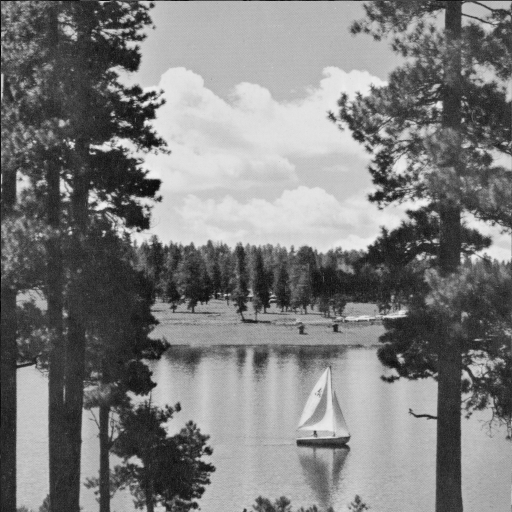

In [5]:
# Исходное изображение без ЦВЗ
model.image

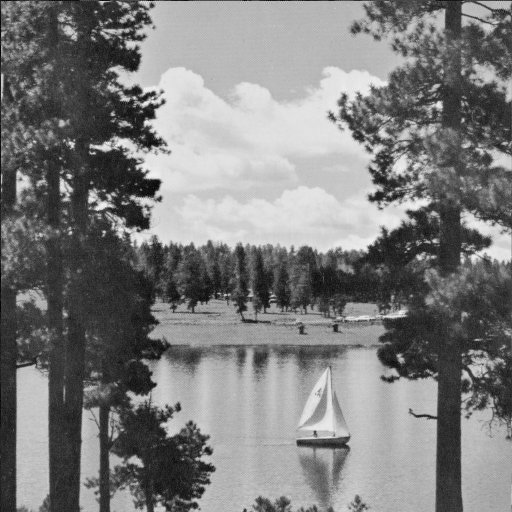

In [6]:
# Полученное изображение с ЦВЗ
watermark.watermark

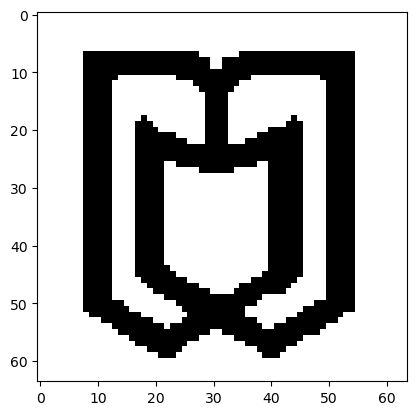

In [7]:
import matplotlib.pyplot as plt

plt.imshow(watermark.extracted_image_bin, cmap=plt.cm.gray)

In [8]:
from src import Attack, Utilities

attacked = Attack(watermark.watermark)

In [9]:
# медианный фильтр

mf = Utilities.extracting(Utilities.matrix_to_image(attacked.mf), watermark.secret_key)
Utilities.get_normal_correlation(mf, watermark.embedded_image_bin)

0.6947953511874684

In [10]:
# фильтр Гаусса

gs3 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs3), watermark.secret_key)
Utilities.get_normal_correlation(gs3, watermark.embedded_image_bin)

1.0

In [11]:
# фильтр Гаусса, kernel=5

gs5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs5), watermark.secret_key)
Utilities.get_normal_correlation(gs5, watermark.embedded_image_bin)

1.0

In [12]:
# усредненная фильтрация, kernel=3

avr = Utilities.extracting(Utilities.matrix_to_image(attacked.avr), watermark.secret_key)
Utilities.get_normal_correlation(avr, watermark.embedded_image_bin)

0.6438426162493612

In [13]:
# Фильтр увеличивает контраст соседних пикселей

shr = Utilities.extracting(Utilities.matrix_to_image(attacked.shr), watermark.secret_key)
Utilities.get_normal_correlation(shr, watermark.embedded_image_bin)

0.9996388587937883

In [14]:
# Изменение контрастности изображения с использованием гистограмм

his = Utilities.extracting(Utilities.matrix_to_image(attacked.his), watermark.secret_key)
Utilities.get_normal_correlation(his, watermark.embedded_image_bin)

0.9862606758262161

In [15]:
# Искажения яркости пикселей с параметром gamma=0.2

gc2 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc2), watermark.secret_key)
Utilities.get_normal_correlation(gc2, watermark.embedded_image_bin)

0.8376649340263894

In [16]:
# Искажения яркости пикселей с параметром gamma=0.4

gc4 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc4), watermark.secret_key)
Utilities.get_normal_correlation(gc4, watermark.embedded_image_bin)

0.9831223628691983

In [17]:
# Гауссовый шум с параметром 0,001

gn1 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn1), watermark.secret_key)
Utilities.get_normal_correlation(gn1, watermark.embedded_image_bin)

1.0

In [18]:
# Гауссовый шум с параметром 0,005

gn5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn5), watermark.secret_key)
Utilities.get_normal_correlation(gn5, watermark.embedded_image_bin)

0.998189717595945

In [19]:
# Гауссовый шум с параметром 0,009

gn9 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn9), watermark.secret_key)
Utilities.get_normal_correlation(gn9, watermark.embedded_image_bin)

0.9931109499637418

In [20]:
# Атака соль/перец с параметром p=0.01

sp1 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp1), watermark.secret_key)
Utilities.get_normal_correlation(sp1, watermark.embedded_image_bin)

0.9095617529880478

In [21]:
# Атака соль/перец с параметром p=0.02

sp2 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp2), watermark.secret_key)
Utilities.get_normal_correlation(sp2, watermark.embedded_image_bin)

0.8616932103939648

In [22]:
# Атака соль/перец с параметром p=0.03

sp3 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp3), watermark.secret_key)
Utilities.get_normal_correlation(sp3, watermark.embedded_image_bin)

0.8221930974224552

In [23]:
# В заданной области затемняет 1/4 пикселей, с параметром center

crp_ct = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_ct), watermark.secret_key)
Utilities.get_normal_correlation(crp_ct, watermark.embedded_image_bin)

0.9106145251396648

In [24]:
# В заданной области затемняет 1/4 пикселей, с параметром top-left

crp_tl = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_tl), watermark.secret_key)
Utilities.get_normal_correlation(crp_tl, watermark.embedded_image_bin)

0.8895666131621188

In [25]:
# В заданной области затемняет 1/4 пикселей, с параметром bottom-right

crp_br = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_br), watermark.secret_key)
Utilities.get_normal_correlation(crp_br, watermark.embedded_image_bin)

0.9094191007548408

In [26]:
# Растягивает изображения и возвращает к изначальным размерам 

scl_1024 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_1024), watermark.secret_key)
Utilities.get_normal_correlation(scl_1024, watermark.embedded_image_bin)

0.94765625

In [27]:
# Сжимает изображения и возвращает к изначальным размерам 

scl_256 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_256), watermark.secret_key)
Utilities.get_normal_correlation(scl_256, watermark.embedded_image_bin)

0.7110341415141019

In [28]:
# Вращает изображение против часовой стрелки на заданный угол, 5 градусов

rt5 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt5), watermark.secret_key)
Utilities.get_normal_correlation(rt5, watermark.embedded_image_bin)

0.7096487327701201

In [29]:
# Вращает изображение против часовой стрелки на заданный угол, 45 градусов

rt45 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt45), watermark.secret_key)
Utilities.get_normal_correlation(rt45, watermark.embedded_image_bin)

0.6785944551901999

In [30]:
# Вращает изображение против часовой стрелки на заданный угол, 90 градусов

rt90 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt90), watermark.secret_key)
Utilities.get_normal_correlation(rt90, watermark.embedded_image_bin)

0.6830080913850547

In [31]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 70

com70 = Utilities.extracting(Utilities.matrix_to_image(attacked.com70), watermark.secret_key)
Utilities.get_normal_correlation(com70, watermark.embedded_image_bin)

1.0

In [32]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 80

com80 = Utilities.extracting(Utilities.matrix_to_image(attacked.com80), watermark.secret_key)
Utilities.get_normal_correlation(com80, watermark.embedded_image_bin)

1.0

In [33]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 90

com90 = Utilities.extracting(Utilities.matrix_to_image(attacked.com90), watermark.secret_key)
Utilities.get_normal_correlation(com90, watermark.embedded_image_bin)

1.0